In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('food_coded.csv')

In [4]:
#描述性統計- data describe
def describe(df):
    df_des=df.describe(include='all',datetime_is_numeric=True)
    return df_des.round(2)
data_des = describe(data)
data_des

,ID,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
count,125.00,121.00,125.00,125.00,125.00,106.00,124.00,125.00,124,124,...,124.00,123.00,125.00,124.00,125.00,104,125.00,125.00,125.00,122.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124,107,...,NaN,NaN,NaN,NaN,NaN,67,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chicken fingers, pizza",boredom,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,7,...,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN
mean,63.00,3.42,1.39,1.11,577.32,3.03,505.24,1.75,NaN,NaN,...,1.22,1.39,3.34,947.58,555.04,NaN,4.01,1.51,1073.40,159.05
std,36.23,0.39,0.49,0.32,131.21,0.64,230.84,0.43,NaN,NaN,...,0.41,0.49,1.44,202.09,152.37,NaN,1.08,0.50,248.67,32.38
min,1.00,2.20,1.00,1.00,265.00,2.00,315.00,1.00,NaN,NaN,...,1.00,1.00,1.00,580.00,345.00,NaN,1.00,1.00,575.00,100.00
25%,32.00,3.20,1.00,1.00,430.00,3.00,420.00,2.00,NaN,NaN,...,1.00,1.00,2.00,725.00,500.00,NaN,3.00,1.00,900.00,135.00
50%,63.00,3.50,1.00,1.00,610.00,3.00,420.00,2.00,NaN,NaN,...,1.00,1.00,3.00,940.00,500.00,NaN,4.00,2.00,900.00,155.00
75%,94.00,3.70,2.00,1.00,720.00,3.00,420.00,2.00,NaN,NaN,...,1.00,2.00,5.00,1165.00,690.00,NaN,5.00,2.00,1315.00,180.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            125 non-null    int64  
 1   GPA                           121 non-null    float64
 2   Gender                        125 non-null    int64  
 3   breakfast                     125 non-null    int64  
 4   calories_chicken              125 non-null    int64  
 5   calories_day                  106 non-null    float64
 6   calories_scone                124 non-null    float64
 7   coffee                        125 non-null    int64  
 8   comfort_food                  124 non-null    object 
 9   comfort_food_reasons          124 non-null    object 
 10  comfort_food_reasons_coded    106 non-null    float64
 11  cook                          122 non-null    float64
 12  comfort_food_reasons_coded.1  125 non-null    int64  
 13  cuisi

In [306]:
def read_dataset(fname):
    # 指定索引
    data = pd.read_csv(fname, index_col=0) 
    data = data.reset_index()
    # 取喜好類型
    data = data[['weight','Gender','sports', 'breakfast','coffee','drink','fries','soup']]
    # 處理遺缺值
    data = data.dropna()
    # 指定索引
    data = data.reset_index(drop=True)
    return data

train = read_dataset('food_coded.csv')

In [307]:
#重新排序
train = train.reset_index(drop=True)

In [308]:
train['weight']=train['weight'].astype(int)
train

,weight,Gender,sports,breakfast,coffee,drink,fries,soup
0,187,2,1.0,1,1,1.0,2,1.0
1,155,1,1.0,1,2,2.0,1,1.0
2,240,1,2.0,1,2,2.0,2,1.0
3,190,1,1.0,1,2,2.0,1,1.0
4,190,1,2.0,1,2,2.0,1,1.0
...,...,...,...,...,...,...,...,...
113,185,2,1.0,1,2,1.0,1,1.0
114,156,1,1.0,1,2,2.0,1,1.0
115,120,1,2.0,1,1,1.0,1,1.0
116,135,2,2.0,1,1,2.0,1,2.0


In [309]:
# 0-50kg:first; 50-100kg:second; >100kg:third

def BMIStandard(train):
#     # 分四群
#     if train["weight"]<135:
#         train["weight_range"] = "first"
#     elif train["weight"]<155:
#         train["weight_range"]= "second"
#     elif train["weight"]<180:
#         train["weight_range"] = "third"
#     else:
#         train["weight_range"] = "forth"
        
    # 分兩群
    if train["weight"]<155:
        train["weight_range"] = "first"
    else:
        train["weight_range"] = "second"
    return train
train=train.apply(BMIStandard,axis=1)
train

,weight,Gender,sports,breakfast,coffee,drink,fries,soup,weight_range
0,187.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,second
1,155.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,second
2,240.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,second
3,190.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,second
4,190.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,second
...,...,...,...,...,...,...,...,...,...
113,185.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,second
114,156.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,second
115,120.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,first
116,135.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,first


In [310]:
labels = train["weight_range"].unique().tolist()
train["weight_range"]=train["weight_range"].apply(lambda n: labels.index(n))

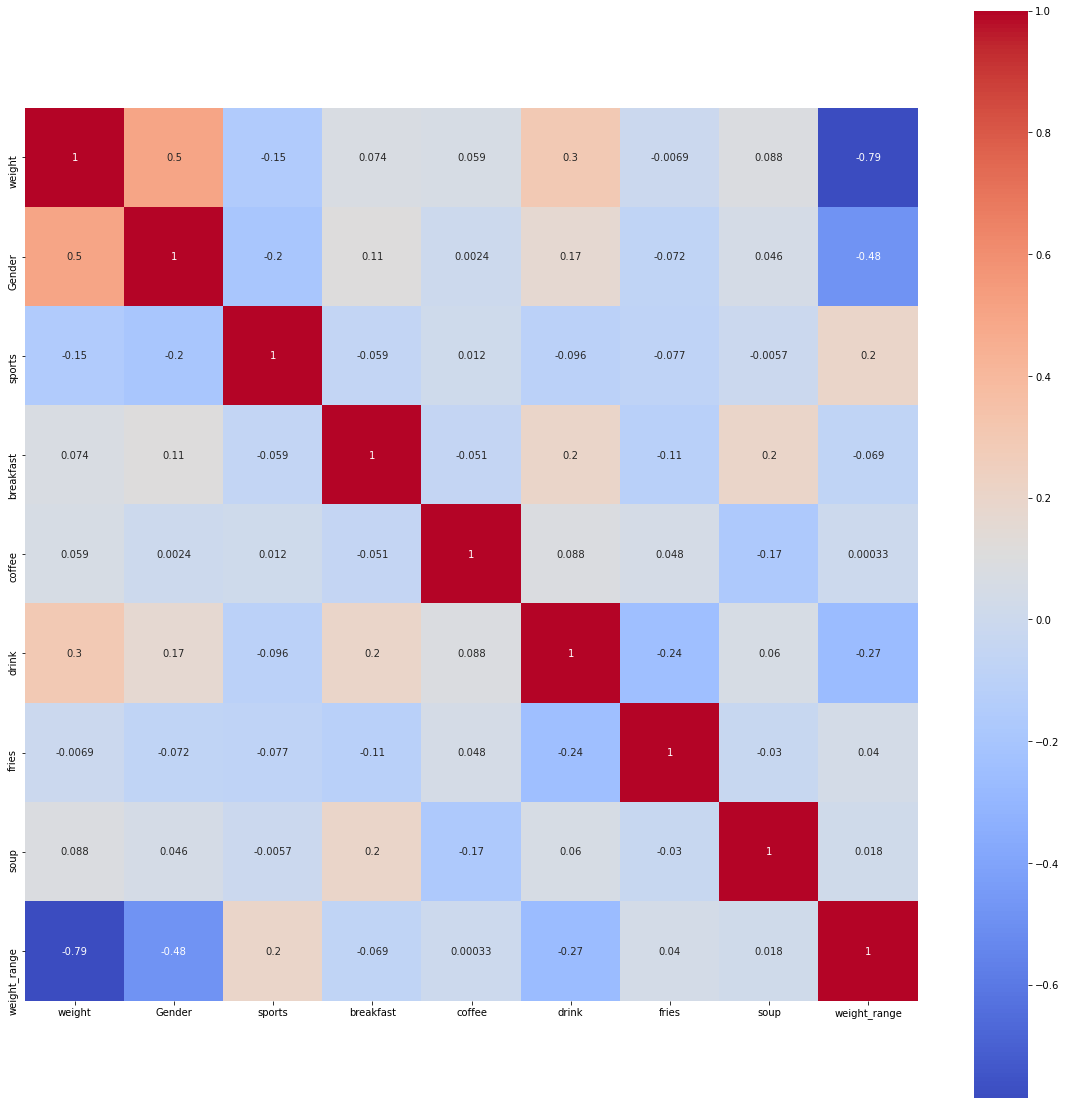

In [311]:
#計算correlation
#取特徵欄位
features_mean= list(train.columns)
# print(features_mean)

plt.figure(figsize=(20,20))
sns.heatmap(train[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [312]:
from sklearn.model_selection import train_test_split
y = train["weight_range"].values
X = train.drop(["weight_range","weight"], axis=1).values
#切分訓練與驗證資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('train dataset: {0}; test dataset: {1}'.format(X_train.shape, X_test.shape))

train dataset: (94, 7); test dataset: (24, 7)


In [313]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.8297872340425532; test score: 0.6666666666666666


best param: 5; best score: 0.7083333333333334


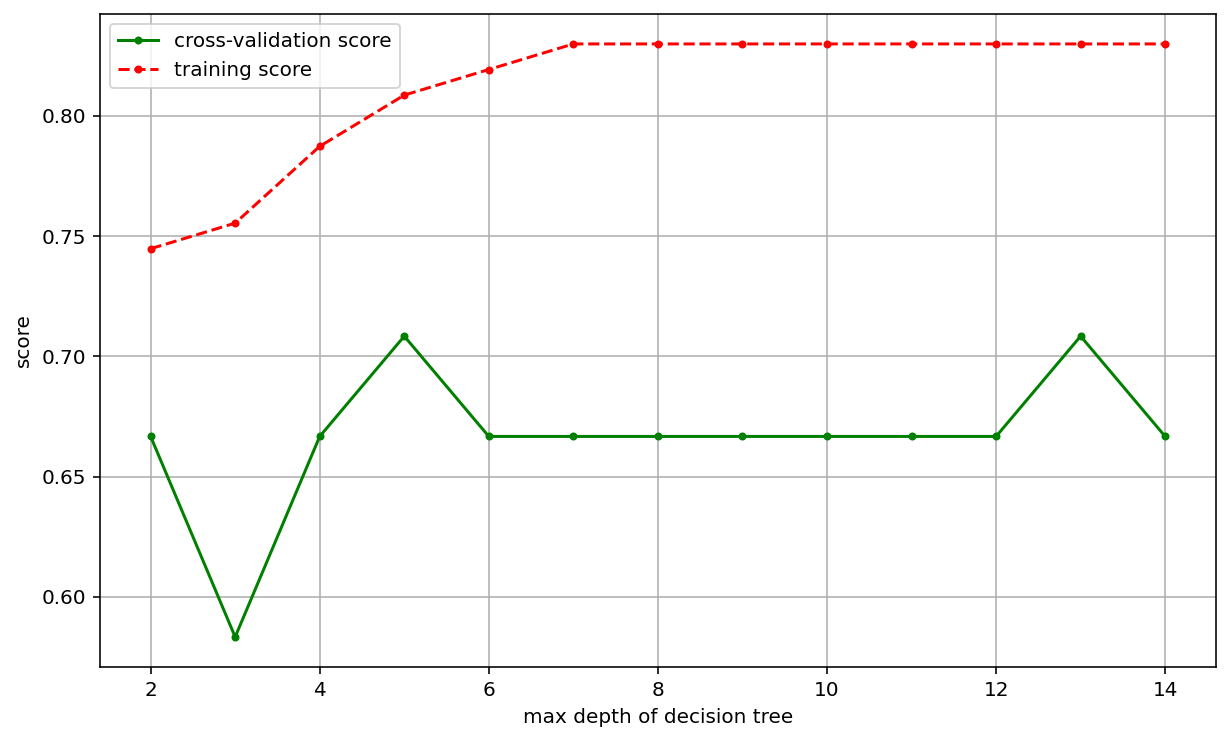

In [314]:
from sklearn.tree import DecisionTreeClassifier

#調整參數max_depth
def cv_score(d):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

#設定深度2~15
depths = range(2, 15)
scores = [cv_score(d) for d in depths]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

#找出驗證資料集分數最高的索引
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = depths[best_score_index]
#列印最好的參數
print('best param: {0}; best score: {1}'.format(best_param, best_score))

plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')
plt.plot(depths, tr_scores, '.r--', label='training score')
plt.legend()

best param: 0.37755102040816324; best score: 0.7916666666666666


C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

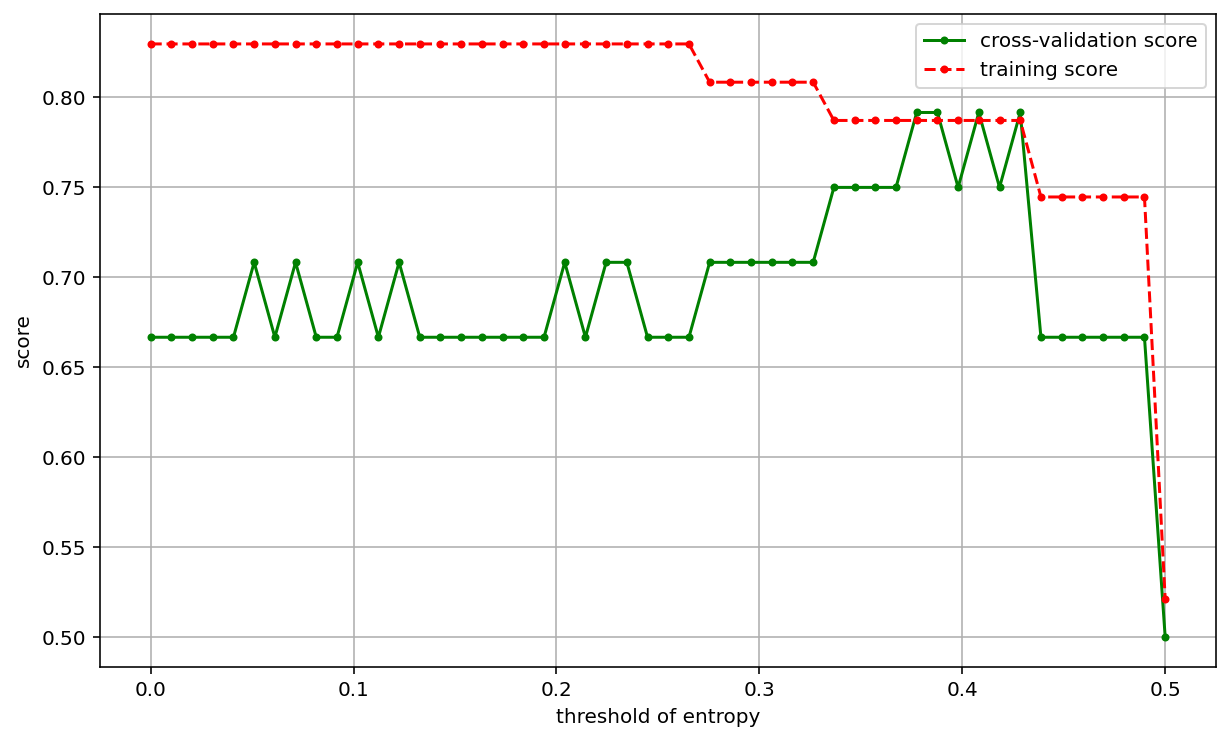

In [315]:
#利用基尼不純度
#設定閥值參數(min_impurity_split)，當information gain低於這個閥值時，則不進行分歧
def cv_score(val):
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_split=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定閥值範圍
values = np.linspace(0, 0.5, 50)
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出分數最高的參數
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 畫圖
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

In [316]:
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


best param: {'min_impurity_split': 0.4591836734693877}
best score: 0.7271739130434782


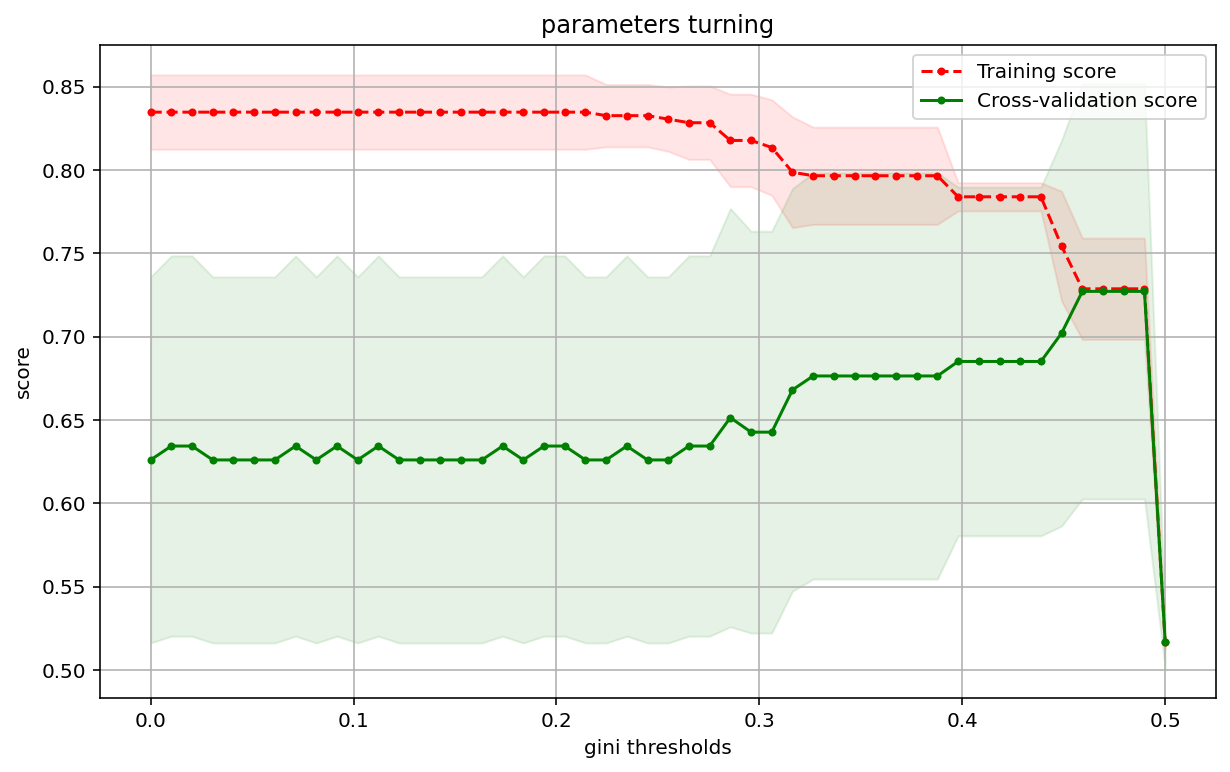

In [317]:
#透過GridSearchCV進行
#優點: 1. 內建交驗驗證，讓資料樣本穩定 2. 可以同時設定多個參數
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.5, 50)
param_grid = {'min_impurity_split': thresholds}

#每次計算時，都把資料切成5份，拿其中一份做為交叉驗證資料集，其他做為訓練資料集
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')

In [318]:
#進行多個參數設定
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 1, 50)
gini_thresholds = np.linspace(0, 0.5, 50)

#ID3
param_grid = [{'criterion': ['entropy'], 
               'min_impurity_split': entropy_thresholds},
              {'criterion': ['gini'], 
               'min_impurity_split': gini_thresholds},
              {'max_depth': range(2, 10)},
              {'min_samples_split': range(2, 30, 2)}]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

best param: {'criterion': 'entropy', 'min_impurity_split': 0.9387755102040816}
best score: 0.7271739130434782


C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_c

In [321]:
clf = DecisionTreeClassifier(criterion='entropy', min_impurity_split=0.4591836734693877)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

from sklearn import tree

with open("Decision_Tree/Weight_偏好_混淆矩陣.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

train score: 0.8297872340425532; test score: 0.6666666666666666


C:\Users\jenny\anaconda3\lib\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


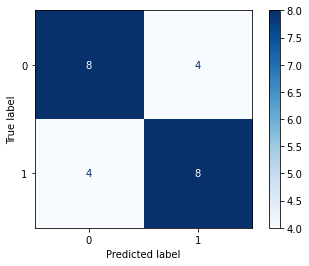

In [322]:
from sklearn import metrics

pred_test_y = clf.predict(X_test)
metrics.plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')
plt.grid(False)